In [2]:
import numpy as np
import pandas as pd
import os
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mpu
from sklearn import preprocessing

# MEREG THE MEASURES

In [3]:
city        = 'london'
outfolder   = '../ProcessedData/' + city + '/'
successdata = outfolder + 'venues_info/' + city + '_venues_success_measures.csv'

In [4]:
def get_centroids(c):
     return (sum(c[0])/len(c[0]),sum(c[1])/len(c[1]))

def encode_cats(df, column):
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])    
    return df

In [5]:
nc_threshold = 5000

In [6]:
# get the yelp money things
ward_yelp_money    = outfolder + 'venues_info/london_price_wards_yelp.csv'
ward_money         = pd.read_csv(ward_yelp_money, sep = ',', index_col = 0)#.drop(['ward'], axis=1)
ward_money         = ward_money[~ward_money.index.duplicated(keep='first')] 
ward_money         = ward_money.rename(index=str, columns={aa : 'yelp_' +  aa  for aa in ward_money.keys()})    
ward_money['ward'] = ward_money.index

In [7]:
# basic stats of wards: bbox, length, area
outfolder    = '../ProcessedData/' + city + '/'
ward_stats_f = outfolder + 'venues_info/venues_ward_full.dat'
ward_stats   = pd.read_csv(ward_stats_f, sep = '\t', index_col = 0)
ward_stats   = ward_stats[~ward_stats.index.duplicated(keep='first')]   
ward_stats   = pd.merge(ward_stats, ward_money, how='left', on='ward', right_index=True)
ward_stats   = ward_stats.drop(['ward'], axis=1)

# get the distance from the center
lngs = list(ward_stats.lng)
lats = list(ward_stats.lat)
london_lng, london_lat = get_centroids((lngs, lats))
ward_stats['distance_from_center'] = ward_stats.apply(lambda row: mpu.haversine_distance((row.lat, row.lng ), (london_lat, london_lng)), axis=1)

ward_stats.head()

,lng,lat,lng0,lat0,lng1,lat1,length,area,yelp_biz_cnt,yelp_price_avg,yelp_price_median,distance_from_center
venue,,,,,,,,,,,,
4ed012c26c2510ace08f6196,-0.148227,51.506406,-0.158366,51.501861,-0.128997,51.520817,0.085100,0.000259,2603.0,2.339207,2.0,0.934851
5131bfc3e4b021182eb750c3,-0.116914,51.540017,-0.126362,51.530726,-0.110892,51.548216,0.057344,0.000147,188.0,1.666667,2.0,3.691962
54075d1f498e92eeef450c56,-0.134685,51.513940,-0.158366,51.501861,-0.128997,51.520817,0.085100,0.000259,2603.0,2.339207,2.0,0.567801
5214b8fb11d2f8576bfde883,-0.097689,51.373167,-0.107011,51.362173,-0.063469,51.382757,0.130389,0.000487,262.0,1.861386,2.0,15.310636
5260ef75498eda1e8cbc86b2,-0.117076,51.518833,-0.130472,51.512652,-0.105350,51.525517,0.073794,0.000155,1080.0,1.981481,2.0,1.680327


In [8]:
# category stats of wards: number of venues, fraction of food, nightlife..., entropy
ward_cats_f  = outfolder + 'venues_info/' + city + '_WARD_category_stats.csv'
ward_cats    = pd.read_csv(ward_cats_f, sep = '\t', index_col = 0).drop(['ward'], axis=1)
ward_cats    = ward_cats[~ward_cats.index.duplicated(keep='first')]   
ward_cats    = encode_cats(ward_cats, 'venue_cat')
ward_cats    = encode_cats(ward_cats, 'venue_subcat')

ward_cats.index.names = ['venue']

ward_cats.head()

,building,food,na,travel,Venues_num,user_centroids,parks_outdoors,Entropy,nightlife,venue_subcat,venue_cat,shops,education,event,arts_entertainment
venue,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0.175676,0.280405,0.010135,0.187500,592,192,0.043919,0.811208,0.054054,79,7,0.170608,0.050676,0.000000,0.027027
4abcec53f964a520b98720e3,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,0.082808,130,1,0.168011,0.018906,0.013990,0.084573
4abdc1c7f964a5206d8b20e3,0.317386,0.252042,0.016336,0.039090,1714,651,0.030922,0.781289,0.078180,24,1,0.183197,0.037923,0.003501,0.041424
4abe4502f964a520558c20e3,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,0.082808,130,1,0.168011,0.018906,0.013990,0.084573
4abe5714f964a520d68c20e3,0.199941,0.273588,0.016169,0.053239,10143,5276,0.012620,0.770677,0.086069,136,8,0.275067,0.008380,0.005521,0.069407


In [9]:
# category frequency stat measures

ward_cats_f  = outfolder + 'venues_info/' + city + '_WARD_category_stats.csv'
ward_cats    = pd.read_csv(ward_cats_f, sep = '\t', index_col = 0).drop(['ward'], axis=1)
ward_cats    = ward_cats[~ward_cats.index.duplicated(keep='first')]   
ward_cats    = encode_cats(ward_cats, 'venue_cat')
ward_cats    = encode_cats(ward_cats, 'venue_subcat')

ward_cats.index.names = ['venue']

ward_cats.head()

,building,food,na,travel,Venues_num,user_centroids,parks_outdoors,Entropy,nightlife,venue_subcat,venue_cat,shops,education,event,arts_entertainment
venue,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0.175676,0.280405,0.010135,0.187500,592,192,0.043919,0.811208,0.054054,79,7,0.170608,0.050676,0.000000,0.027027
4abcec53f964a520b98720e3,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,0.082808,130,1,0.168011,0.018906,0.013990,0.084573
4abdc1c7f964a5206d8b20e3,0.317386,0.252042,0.016336,0.039090,1714,651,0.030922,0.781289,0.078180,24,1,0.183197,0.037923,0.003501,0.041424
4abe4502f964a520558c20e3,0.202420,0.303504,0.009327,0.072473,7934,4835,0.043988,0.827807,0.082808,130,1,0.168011,0.018906,0.013990,0.084573
4abe5714f964a520d68c20e3,0.199941,0.273588,0.016169,0.053239,10143,5276,0.012620,0.770677,0.086069,136,8,0.275067,0.008380,0.005521,0.069407


In [10]:
# combined network measures

network_meas_f  = outfolder + '/networks/' + city + '_COMBINED_networkmeasures_' + str(nc_threshold) + '.csv'
network_meas    = pd.read_csv(network_meas_f, sep = ',', index_col = 0).replace([np.inf, -np.inf], np.nan).fillna(0.0)
network_meas    = network_meas[~network_meas.index.duplicated(keep='first')]   

network_meas.index.names = ['venue']

network_meas.head()

,us_eigenvector_entropy,us_strength_geo_avg,u_pagerank_geo_avg,u_pagerank_geo_std,u_degree_std,us_pagerank_avg,u_closeness_std,u_betweenness_std,us_clustering_geo_std,u_eigenvector_entropy,...,v_pagerank_w,v_clustering_w,v_constraint_geo,v_clustering_geo,v_betweenness_w,v_constraint,v_egosize,v_geo_stdev_of_ego,v_eigenvector,v_social_stretch
venue,,,,,,,,,,,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0.000000,2.989002,1.211112e-06,1.218646e-06,0.670354,6.986806e-06,5.227823e-08,7825.375658,0.053333,0.445236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4abcec53f964a520b98720e3,0.000000,0.000000,2.473126e-06,2.606565e-06,1.707969,0.000000e+00,1.154123e-05,26425.541908,0.000000,0.617763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4abdc1c7f964a5206d8b20e3,0.000000,0.988697,4.881170e-07,7.030505e-07,0.328942,2.876239e-06,1.013314e-06,5703.073122,0.000000,0.653693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4abe4502f964a520558c20e3,0.057059,0.332064,5.597751e-08,9.229690e-08,0.000000,5.801556e-07,2.670204e-07,673.549573,0.002381,0.683058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4abe5714f964a520d68c20e3,0.000000,8.262264,7.961964e-07,7.754698e-07,0.297802,7.285443e-06,5.527000e-06,5555.302564,0.000000,0.617648,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# user and venue span measures
venue_span_f = outfolder + '/venues_info/' + city + '_venues_geo_features.csv'
venue_span   = pd.read_csv(venue_span_f, sep = '\t', index_col = 0).replace([np.inf, -np.inf], np.nan).fillna(0.0)

venues_user_span_f = outfolder + '/venues_info/' + city + '_users_AGGERG_venues_geo_features.csv'
venues_user_span   = pd.read_csv(venues_user_span_f, sep = '\t', index_col = 0).replace([np.inf, -np.inf], np.nan).fillna(0.0)



In [12]:
# number of regulars
regulars_f = outfolder + '/venues_info/venues_REGULARS.dat'
regulars   = pd.read_csv(regulars_f, sep = '\t', index_col = 0, header = None).replace([np.inf, -np.inf], np.nan).fillna(0.0)
regulars   = regulars.rename(columns = {1 : 'usercn', 2 : 'regulars', 3 : 'fraction_of_regulars'})
regulars.index.names = ['venue']

regulars.head()
#venue + '\t' + str(usercn) + '\t' + str(regulars) + '\t' + str(float(regulars) / float(usercn)


,usercn,regulars,fraction_of_regulars
venue,,,
4cd809377bb06dcbd82ca0b2,1,1,1.0
4ed3c7db2c5bc3505ae7a3d2,1,0,0.0
4f6437a9e4b0bf1011a9a074,1,0,0.0
536de056498e53e8abce1ca8,1,0,0.0
561fdc59498e732a5c6a678d,1,0,0.0


In [13]:
# success avgs of users based on the places they like
users_success_f = outfolder + '/venues_info/USERS_likes_successmeas.dat'
users_success   = pd.read_csv(users_success_f, sep = ',', index_col = 0).replace([np.inf, -np.inf], np.nan).fillna(0.0)

users_success.head()


,tipCount_avg,tipCount_std,lLondonLike_std,usersCount_avg,lLondonLike_entropy,checkinsCount_avg,usersCount_std,usersCount_entropy,checkinsCount_entropy,checkinsCount_std,tipCount_entropy,lLondonLike_avg
100001187,185.833333,202.383231,254.951143,22614.083333,0.768071,28607.750000,25429.369252,0.741642,0.763361,30362.940515,0.756986,245.626948
100002121,62.000000,0.000000,0.000000,2429.000000,0.000000,4883.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.962459
10000216,350.000000,366.432349,195.147069,37367.666667,0.662945,52601.333333,35383.966278,0.613079,0.771035,38791.882917,0.497830,245.713340
10000221,26.000000,0.000000,0.000000,1435.000000,0.000000,2896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.786776
100006753,30.000000,0.000000,0.000000,1788.000000,0.000000,2403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.498092


In [118]:
#4sqr money measures
foursqr_money_f = outfolder + '/venues_info/' + city + '_venues_FINAL_money.dat'
foursqr_money   = pd.read_csv(foursqr_money_f, sep = ',', index_col = 0).replace([np.inf, -np.inf], np.nan).fillna(0.0)
foursqr_money   = foursqr_money[(foursqr_money.T != 0).any()]

print len(foursqr_money.m_1_fraction), len(foursqr_money.keys())
foursqr_money

96144 8


,m_entropy,m_avg,m_4_fraction,m_dollars,m_std,m_2_fraction,m_3_fraction,m_1_fraction
venue,,,,,,,,
4a5f9446f964a520e0bf1fe3,0.990294,1.836947,0.016897,3551,0.735049,0.483807,0.151225,0.348071
4abcec53f964a520b98720e3,0.990372,1.997953,0.029171,1954,0.759785,0.510235,0.200102,0.260491
4abdc1c7f964a5206d8b20e3,0.992649,1.809184,0.009413,11367,0.669243,0.543943,0.118501,0.328143
4abe4502f964a520558c20e3,0.992839,1.797899,0.017294,55106,0.716934,0.497042,0.124487,0.361177
4abe5714f964a520d68c20e3,0.992027,2.008383,0.030630,6203,0.746594,0.534419,0.191037,0.243914
4abf8c03f964a520079120e3,0.992842,1.934749,0.029665,68903,0.773986,0.485683,0.180036,0.304617
4ac4bb54f964a520e49e20e3,0.993008,1.908172,0.021225,22662,0.714275,0.545053,0.149722,0.284000
4ac51183f964a52045a020e3,0.989546,2.058717,0.053749,2214,0.825400,0.476513,0.210479,0.259259
4ac51183f964a52046a020e3,0.990006,1.801494,0.012807,937,0.667174,0.553895,0.104589,0.328709


In [15]:
#category embeddedness measures
cat_embeddedness_f = outfolder + '/venues_info/CATEGORY_embeddedness.dat'
cat_embeddedness   = pd.read_csv(cat_embeddedness_f, sep = '\t', index_col = 0)#.replace([np.inf, -np.inf], np.nan).fillna(0.0)
cat_embeddedness   = cat_embeddedness.rename(columns = {c : 'emb_' + c for c in cat_embeddedness.keys()})
cat_embeddedness.index.name = 'venue'
#cat_embeddedness_f   = cat_embeddedness_f[(foursqr_money.T != 0).any()]
cat_embeddedness.head()

,emb_building,emb_own_cat,emb_food,emb_na,emb_travel,emb_parks_outdoors,emb_nightlife,emb_shops,emb_education,emb_event,emb_arts_entertainment
venue,,,,,,,,,,,
4a5f9446f964a520e0bf1fe3,0.707665,2.831711,0.723964,0.715221,0.718768,0.635235,0.736588,0.677092,0.660045,NaN,0.622017
4abcec53f964a520b98720e3,0.482848,12.863672,0.553583,0.552198,0.535929,0.531308,0.555189,0.538843,0.381750,0.604263,0.578616
4abdc1c7f964a5206d8b20e3,0.693835,14.821463,0.671755,0.675918,0.645908,0.675239,0.719115,0.666212,0.550211,0.730456,0.722132
4abe4502f964a520558c20e3,0.358565,18.232509,0.308229,0.289616,0.346224,0.384630,0.308356,0.298544,0.212041,0.354901,0.306995
4abe5714f964a520d68c20e3,0.524198,3.733880,0.569131,0.520373,0.434192,0.454726,0.586633,0.510889,0.501359,0.611484,0.508561


In [16]:
full_features = ward_stats.join(ward_cats)              #  ward_stats, ward_cats 
full_features = full_features.join(network_meas)        #  network_meas
full_features = full_features.join(venue_span)          #  venue_span
full_features = full_features.join(venues_user_span)    #  venues_user_span
full_features = full_features.join(foursqr_money)       #  foursqr_money
full_features = full_features.join(regulars)            #  regular londoners
full_features = full_features.join(users_success)       #  users_success
full_features = full_features.join(cat_embeddedness)    #  cat_embeddedness




full_features = full_features.fillna(0)

len(full_features.keys()), len(full_features)

(227, 101177)

# COMPARE STUFF W CLUSTERS

In [320]:
clusterfolder   = '../ProcessedData/' + city + '/timeseries/senior_clusters_first_demo'
clusterfiles    = [clusterfolder + '/' + fn for fn in os.listdir(clusterfolder)]
senior_vens     = []

for cfn in clusterfiles:
    venues       = [line.strip() for line in open(cfn)]
    senior_vens += venues

In [322]:
clusterfolder   = '../ProcessedData/' + city + '/timeseries/senior_clusters_first_demo'
clusterfiles    = [clusterfolder + '/' + fn for fn in os.listdir(clusterfolder)]
clusters_venues = {}
venues_clusters = {}

for cfn in clusterfiles:
    
    cluster = cfn.split('/')[-1].replace('.dat', '')
    venues  = [line.strip() for line in open(cfn)]
    
    clusters_venues[cluster] = venues
    
    for venue in venues:
        venues_clusters[venue] = cluster
    

In [323]:
venues_clusters_df = pd.DataFrame(venues_clusters.items(), columns = ['venue', 'cluster'])
venues_clusters_df.index = venues_clusters_df.venue
venues_clusters_df = venues_clusters_df.drop(columns = ['venue'])
venues_clusters_df

,cluster
venue,
4b926c3af964a52068f833e3,Rise_and_fall
4b51c64df964a520295527e3,Ephemeral
4ac518c6f964a52000a520e3,Ephemeral
4e988480d22d4d655ac32ea8,Rise_and_fall
4ac518faf964a52031b020e3,Ephemeral
4ade3b73f964a520217421e3,Rise_and_fall
4c4adf66959220a1618cbc0e,Ephemeral
4c91e73051d9b1f758358446,Rise
4ac518b9f964a520bba120e3,Ephemeral


Text(0,0.5,'Probability of being cluster X')

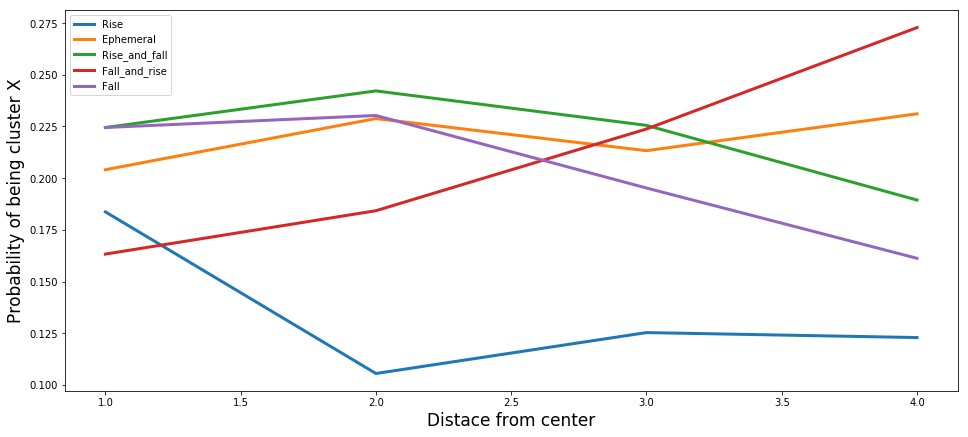

In [319]:
df_dist = pd.DataFrame(ward_stats['distance_from_center'])
df_dist = df_dist[df_dist.index.isin(senior_vens)]
df_dist = df_dist.join(venues_clusters_df)

nbins   = 5
bins    = 10 ** np.linspace(np.log10(min(df_dist.distance_from_center)), np.log10(max(df_dist.distance_from_center)), nbins)  

df_dist['binned'] = np.searchsorted(bins, df_dist['distance_from_center'].values)

labels = (bins[1:] + bins[:-1])/2 
#df_dist['binned'] = pd.cut(df['distance_from_center'], bins=bins)#, labels=[str(l) for l in labels])

f, ax = plt.subplots(1,1, figsize = (16, 7))

for clustername in clusters_venues.keys():

    df_dist_Rise_and_fall = df_dist[df_dist.cluster == clustername]
    a = df_dist_Rise_and_fall.groupby('binned').count()
    b = df_dist.groupby('binned').count()
    try:
        ax.plot(a.index, a.distance_from_center/b.distance_from_center, label = clustername, linewidth = 3)
        ax.legend(loc = 'best')
    except:
        pass
    

ax.set_xlabel('Distace from center', fontsize = 17)
ax.set_ylabel('Probability of being cluster X', fontsize = 17)


In [17]:
clusterfolder   = '../ProcessedData/' + city + '/timeseries/senior_clusters_first_demo'
clusterfiles    = [clusterfolder + '/' + fn for fn in os.listdir(clusterfolder)]
clusters_venues = {}
venues_clusters = {}

for cfn in clusterfiles:
    
    cluster = cfn.split('/')[-1].replace('.dat', '')
    venues  = [line.strip() for line in open(cfn)]
    
    clusters_venues[cluster] = venues
    
    for venue in venues:
        venues_clusters[venue] = cluster

In [18]:
for c, v in clusters_venues.items():
    print c, len(v)

Rise 575
Ephemeral 1063
Rise_and_fall 872
Runner_ups 106
Fall_and_rise 2945
Fall 796


In [137]:
clusters_dfs = {}

for c, venues in clusters_venues.items():
    df = cat_embeddedness[cat_embeddedness.index.isin(venues)]
    clusters_dfs[c] = df
    print c, len(df)


clusters_dfs['Rise_and_fall'].head()

cat_measures = cat_embeddedness.keys()
cat_measures

Rise 404
Ephemeral 735
Rise_and_fall 729
Runner_ups 55
Fall_and_rise 758
Fall 644


Index([u'emb_building', u'emb_own_cat', u'emb_food', u'emb_na', u'emb_travel',
       u'emb_parks_outdoors', u'emb_nightlife', u'emb_shops', u'emb_education',
       u'emb_event', u'emb_arts_entertainment'],
      dtype='object')

In [138]:
def do_plot_on_success_meas(meas):
    
    f, ax    = plt.subplots(2, 3, figsize=(13, 7)) 
    indicies = [(i,j) for i in range(2) for j in range(3)]
    plt.suptitle(meas, fontsize = 18)
      
    for ind, (cluster, df) in enumerate(clusters_dfs.items()):
        
        bx = ax[indicies[ind]]
        #bx.plot(df[meas])
        bx.hist(df[meas], bins = 10, label = cluster + '   #entries = ' + str(len(df)))
        bx.legend(loc = 'best')
        
 

    

venue
4ed012c26c2510ace08f6196     0.934851
5131bfc3e4b021182eb750c3     3.691962
54075d1f498e92eeef450c56     0.567801
5214b8fb11d2f8576bfde883    15.310636
5260ef75498eda1e8cbc86b2     1.680327
4be84747d837c9b6211fa506     3.129098
4b5495ebf964a52044c127e3    12.599665
526295a111d2eefc6ddc5f73    16.681511
4ea2aef30aaf711180b2f463    13.871446
565df9f038fa87af4106c6be     1.647144
4d14af7785fc6dcbdfd3994e     0.545817
50773130e4b0ce304488c1e8     6.605137
581dc631b148840eb11ffe64     2.827644
4f57b6a1e4b04e88c1d5705d    11.593008
4d7fb8f2cd09224b54a76130     1.595176
4fa50536e4b0ac15cf629a8f    15.696983
4f2befa7e4b0e0a34731dfe4     2.591769
50cbbb41e4b029bc9f6914da     5.055921
4b23e169f964a520f85b24e3     4.152045
5405ee19498ebf230f311b32     1.383231
4bb1bb9ff964a520caa03ce3     0.895672
520e427611d2b25560e18476     3.338455
4add6917f964a520f76421e3     4.457564
4d5194d63062a1cdd07068a3     6.121425
54f9d6b0498e414bb84d2455    11.126397
50a78ea8e4b0034096253c46     3.465833
4f61dc

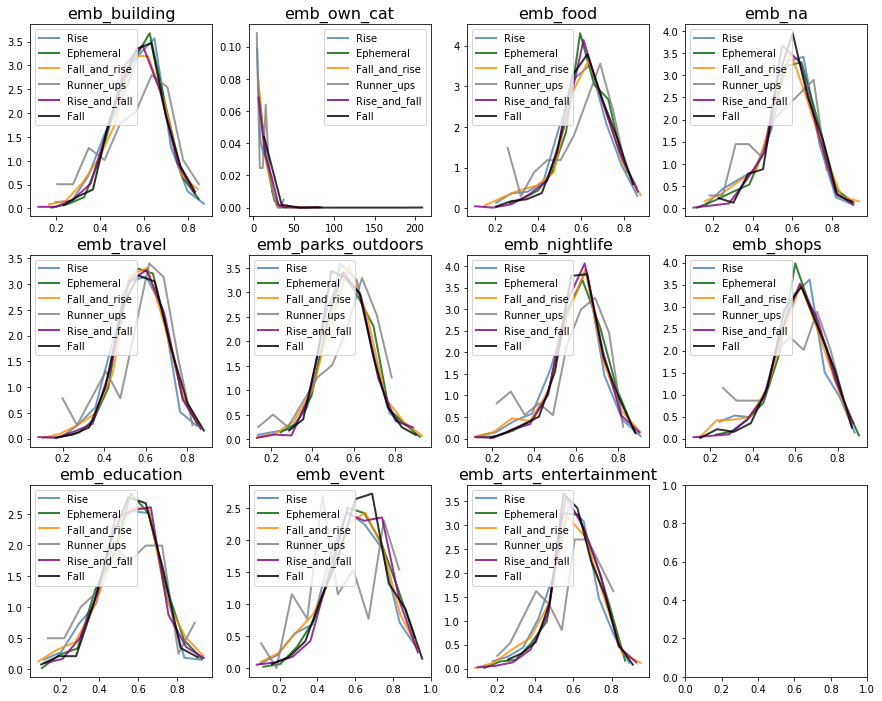

In [139]:
f, ax    = plt.subplots(3, 4, figsize=(15, 12)) 
colors   = ['steelblue', 'darkgreen', 'darkorange', 'grey', 'purple', 'k']
indicies = [(i,j) for i in range(3) for j in range(4)]


def plotmeas(meas, ijk):

    for ind, (cluster, df) in enumerate(clusters_dfs.items()):

        ff, cax    = plt.subplots(1, 1, figsize=(13, 7)) 
        counts, bins, bars = cax.hist(df[meas].dropna(), bins = 10, alpha = 0.0, normed = True)
        plt.close()
        ax[indicies[ijk]].plot((bins[1:] + bins[:-1])/2, counts, 's-', color = colors[ind], alpha = 0.8, markersize = 0, linewidth = 2, label = cluster)
        ax[indicies[ijk]].legend(loc = 'best', fontsize = 10)
        ax[indicies[ijk]].set_title(meas, fontsize = 16)
        #bins = (bins[1:] + bins[:-1])/2    

    
for ijk, meas in enumerate(cat_measures):
    #if ijk == 1: break
    plotmeas(meas, ijk)

#ax[0,1].set_yscale('log')
#ax[0,1].set_xscale('log')

In [121]:
clusters_money_dfs = {}

for c, venues in clusters_venues.items():
    df = foursqr_money[foursqr_money.index.isin(venues)]
    clusters_money_dfs[c] = df
    
clusters_money_dfs['Rise'].head()

,m_entropy,m_avg,m_4_fraction,m_dollars,m_std,m_2_fraction,m_3_fraction,m_1_fraction
venue,,,,,,,,
4abe4502f964a520558c20e3,0.992839,1.797899,0.017294,55106,0.716934,0.497042,0.124487,0.361177
4ac51183f964a52049a020e3,0.992990,1.817495,0.015146,47670,0.709346,0.508957,0.131550,0.344347
4ac518b5f964a520a3a020e3,0.991534,1.923249,0.025550,9863,0.759468,0.493967,0.176316,0.304167
4ac518b8f964a52081a120e3,0.992821,1.901325,0.017609,22488,0.719576,0.525302,0.161597,0.295491
4ac518b9f964a520bea120e3,0.992902,1.847713,0.012266,9620,0.664507,0.572037,0.119439,0.296258


,m_entropy,m_avg,m_4_fraction,m_dollars,m_std,m_2_fraction,m_3_fraction,m_1_fraction
venue,,,,,,,,
4abdc1c7f964a5206d8b20e3,0.992649,1.809184,0.009413,11367,0.669243,0.543943,0.118501,0.328143
4abe5714f964a520d68c20e3,0.992027,2.008383,0.030630,6203,0.746594,0.534419,0.191037,0.243914
4ac4bb54f964a520e49e20e3,0.993008,1.908172,0.021225,22662,0.714275,0.545053,0.149722,0.284000
4ac518b9f964a5209da120e3,0.991868,1.866208,0.018223,6256,0.704504,0.540441,0.135550,0.305786
4ac518b9f964a520afa120e3,0.991045,1.815789,0.016766,4712,0.710715,0.511248,0.127122,0.344864


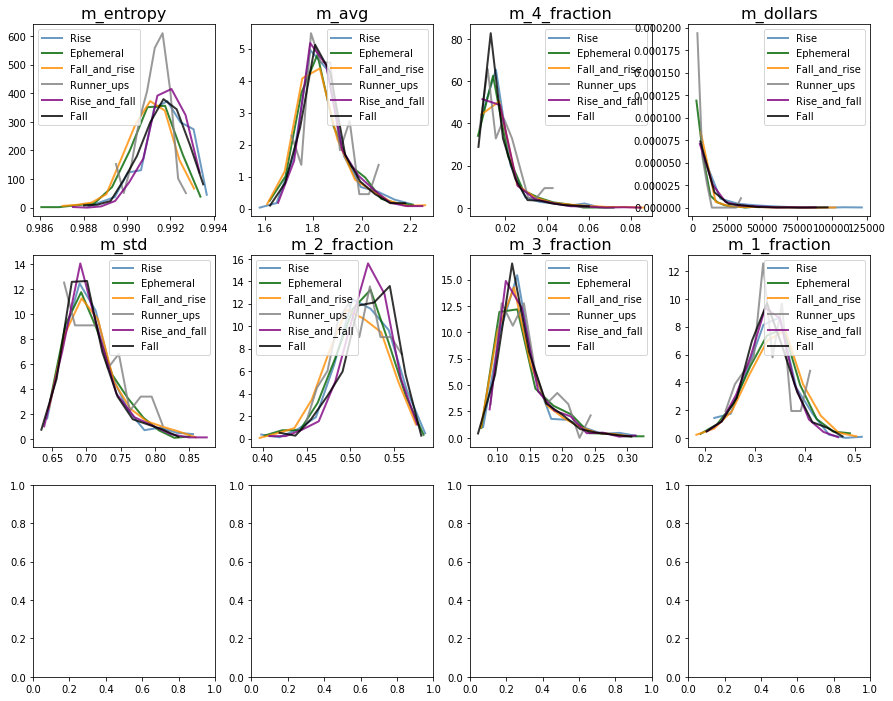

In [135]:
f, ax    = plt.subplots(3, 4, figsize=(15, 12)) 
colors   = ['steelblue', 'darkgreen', 'darkorange', 'grey', 'purple', 'k']
indicies = [(i,j) for i in range(3) for j in range(4)]


def plotmeas(meas, ijk, clusters_money_dfs):

    for ind, (cluster, df) in enumerate(clusters_money_dfs.items()):

        a = 2
        ff, cax    = plt.subplots(1, 1, figsize=(13, 7)) 
        counts, bins, bars = cax.hist(df[meas].dropna(), bins = 10, alpha = 0.0, normed = True)
        
        
        plt.close()
        ax[indicies[ijk]].plot((bins[1:] + bins[:-1])/2, counts, 's-', color = colors[ind], alpha = 0.8, markersize = 0, linewidth = 2, label = cluster)
        ax[indicies[ijk]].legend(loc = 'best', fontsize = 10)
        ax[indicies[ijk]].set_title(meas, fontsize = 16)

    
for ijk, meas in enumerate(clusters_money_dfs['Fall'].keys()):
    plotmeas(meas, ijk, clusters_money_dfs)

clusters_money_dfs['Fall'].head()
#ax[0,3].set_xscale('log')
#ax[0,3].set_yscale('log')


In [130]:
clusters_regulars_dfs = {}

for c, venues in clusters_venues.items():
    df = regulars[regulars.index.isin(venues)]
    clusters_regulars_dfs[c] = df
    
clusters_regulars_dfs['Rise'].head()


,usercn,regulars,fraction_of_regulars
venue,,,
4bee8554ada6b7137d362206,11,2,0.181818
511e7cd0e4b0eaecfc0f759c,96,20,0.208333
4d0293c6e350b60cbfce7742,80,14,0.175000
4acdbc1df964a520dacc20e3,182,26,0.142857
4e9c655cb63497cdaa96ce75,547,58,0.106033


/home/milan/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


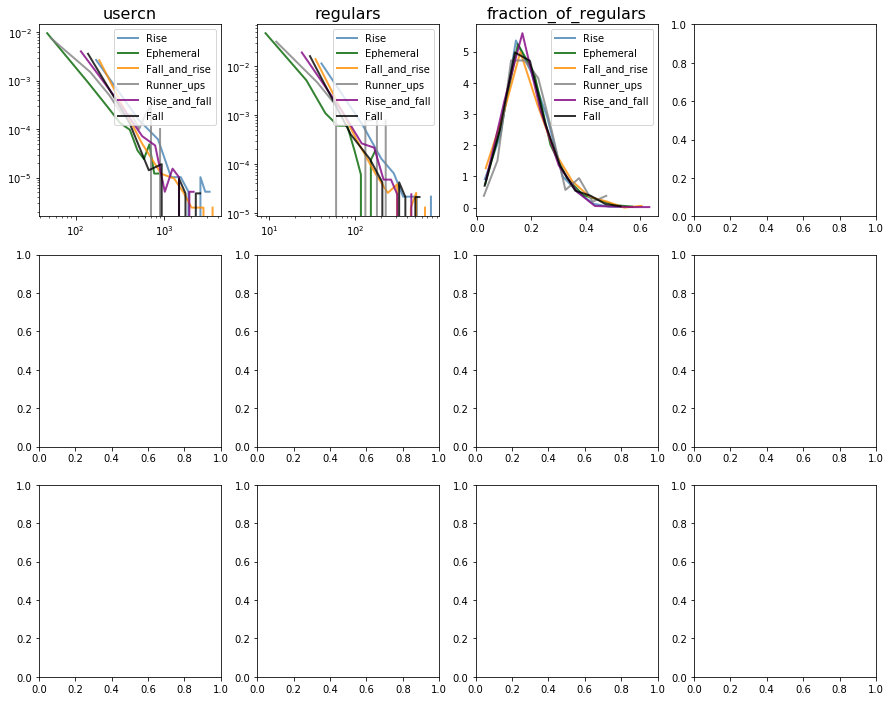

In [134]:
f, ax    = plt.subplots(3, 4, figsize=(15, 12)) 
colors   = ['steelblue', 'darkgreen', 'darkorange', 'grey', 'purple', 'k']
indicies = [(i,j) for i in range(3) for j in range(4)]


def plotmeas(meas, ijk, clusters_money_dfs):

    for ind, (cluster, df) in enumerate(clusters_money_dfs.items()):

        a = 2
        ff, cax    = plt.subplots(1, 1, figsize=(13, 7)) 
        counts, bins, bars = cax.hist(df[meas].dropna(), bins = 10, alpha = 0.0, normed = True)
        
        
        plt.close()
        ax[indicies[ijk]].plot((bins[1:] + bins[:-1])/2, counts, 's-', color = colors[ind], alpha = 0.8, markersize = 0, linewidth = 2, label = cluster)
        ax[indicies[ijk]].legend(loc = 'best', fontsize = 10)
        ax[indicies[ijk]].set_title(meas, fontsize = 16)

    
for ijk, meas in enumerate(clusters_regulars_dfs['Fall'].keys()):
    plotmeas(meas, ijk, clusters_regulars_dfs)

clusters_money_dfs['Fall'].head()
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')